Searching in: /data/yassine/kaouther/vne-sim/Results/history/test
Successfully loaded: First Fit
Successfully loaded: $\sigma=0.2$
Successfully loaded: $\sigma=0.5$
Successfully loaded: $\sigma=0.8$
Successfully loaded: Rkhami


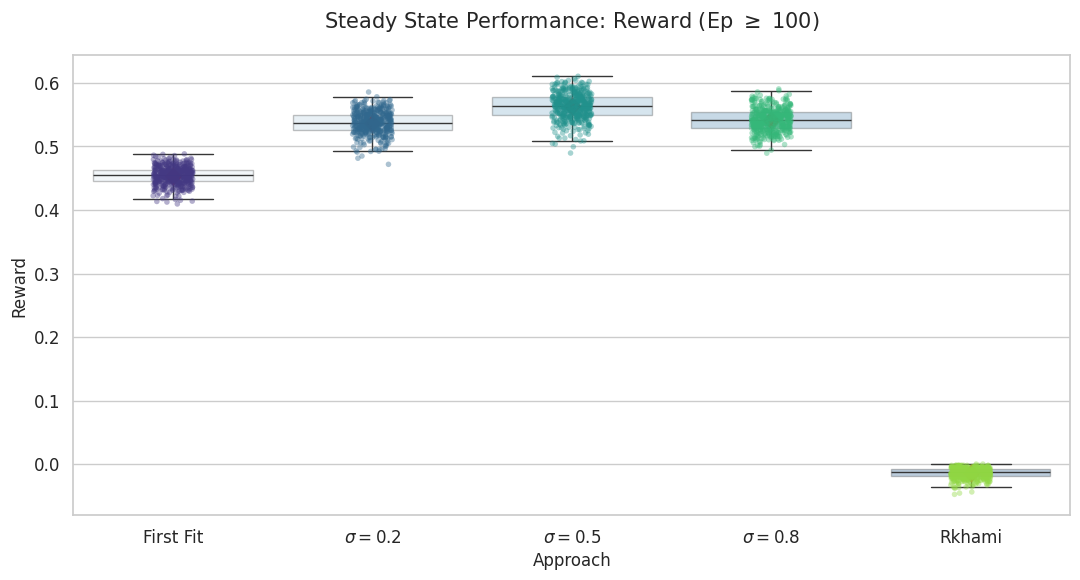

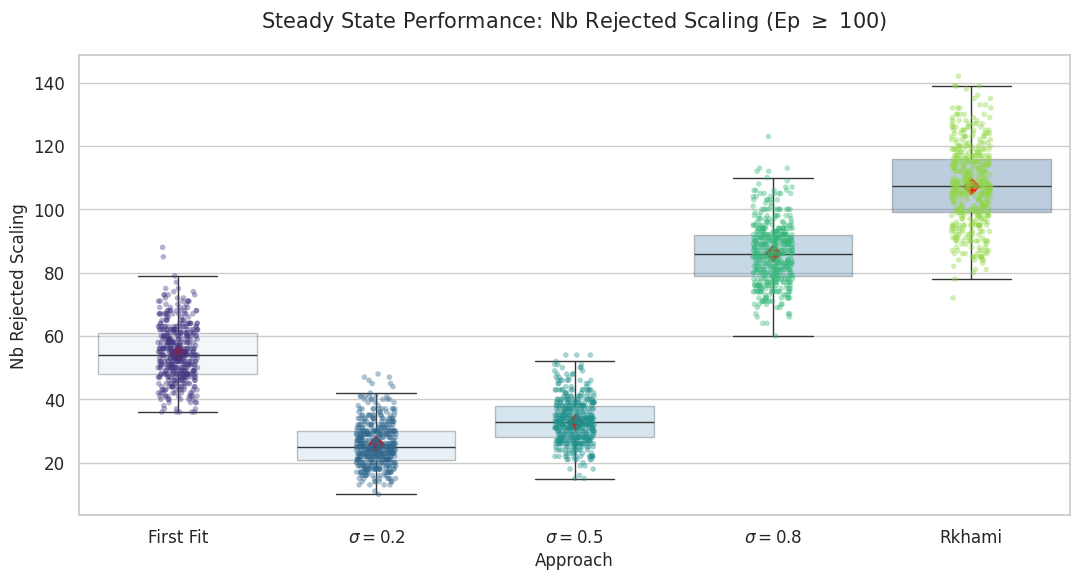

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. SETTINGS & PARAMETERS ---
Ep = 100  # The starting episode for steady-state analysis
metrics_to_plot = ["Reward", "nb_rejected_scaling"]

# Approach labels (using raw strings r"" for LaTeX)
APPROACHES = {
    "First Fit": "Firstfit",
    r"$\sigma=0.2$": "sigma_0.2",
    r"$\sigma=0.5$": "sigma_0.5",
    r"$\sigma=0.8$": "sigma_0.8",
    "Rkhami": "Rkhami"
}

# --- 2. DATA LOADING FUNCTION ---
def load_steady_state_data(config, start_ep):
    all_data = []
    print(f"Searching in: {os.getcwd()}")
    
    for label, folder in config.items():
        file_path = os.path.join(folder, "results.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df_filtered = df[df['episode'] >= start_ep].copy()
            df_filtered['Approach'] = label
            all_data.append(df_filtered)
            print(f"Successfully loaded: {label}")
        else:
            print(f"Warning: Could not find {file_path}")
            
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

# --- 3. PLOTTING FUNCTION ---
def plot_steady_state(df, metric):
    plt.figure(figsize=(11, 6))
    sns.set_style("whitegrid")
    
    # 1. Stripplot for individual episode points
    sns.stripplot(
        data=df, x="Approach", y=metric, 
        hue="Approach", palette="viridis", 
        alpha=0.4, jitter=True, legend=False, size=4
    )
    
    # 2. Boxplot for variance/distribution
    sns.boxplot(
        data=df, x="Approach", y=metric, 
        palette="Blues", hue="Approach", legend=False,
        showfliers=False, boxprops={'alpha': 0.3}
    )
    
    # 3. Pointplot for the Mean
    sns.pointplot(
        data=df, x="Approach", y=metric, 
        estimator='mean', color='red', markers='D', 
        linestyles='', errorbar=None
    )

    clean_name = metric.replace('_', ' ').title()
    
    # FIX: Use rf"" to allow both {variables} and LaTeX \backslashes without warnings
    plt.title(rf"Steady State Performance: {clean_name} (Ep $\geq$ {Ep})", fontsize=15, pad=20)
    
    plt.xlabel("Approach", fontsize=12)
    plt.ylabel(clean_name, fontsize=12)
    plt.tight_layout()
    plt.show()

# --- 4. EXECUTION ---
# (Ensure os.chdir was run previously)
df_steady = load_steady_state_data(APPROACHES, Ep)

if not df_steady.empty:
    for metric in metrics_to_plot:
        if metric in df_steady.columns:
            plot_steady_state(df_steady, metric)

Found 24 metrics to plot. Generating...


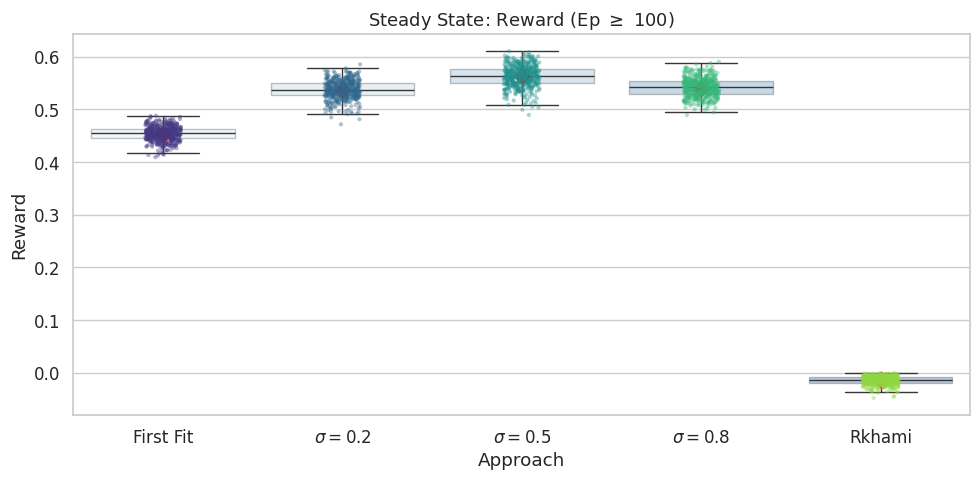

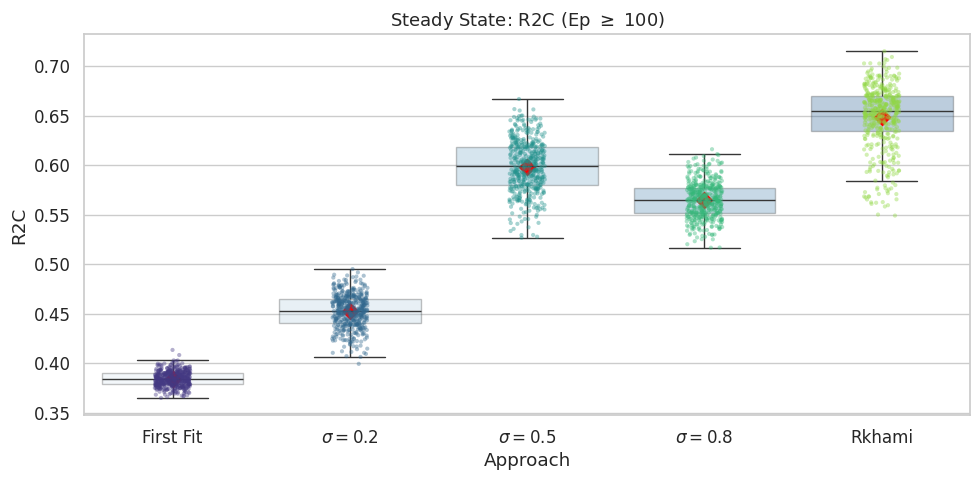

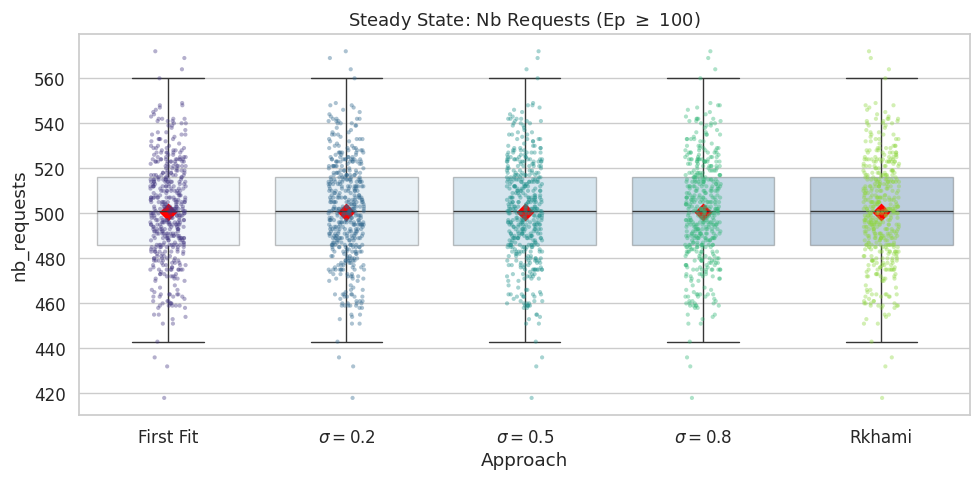

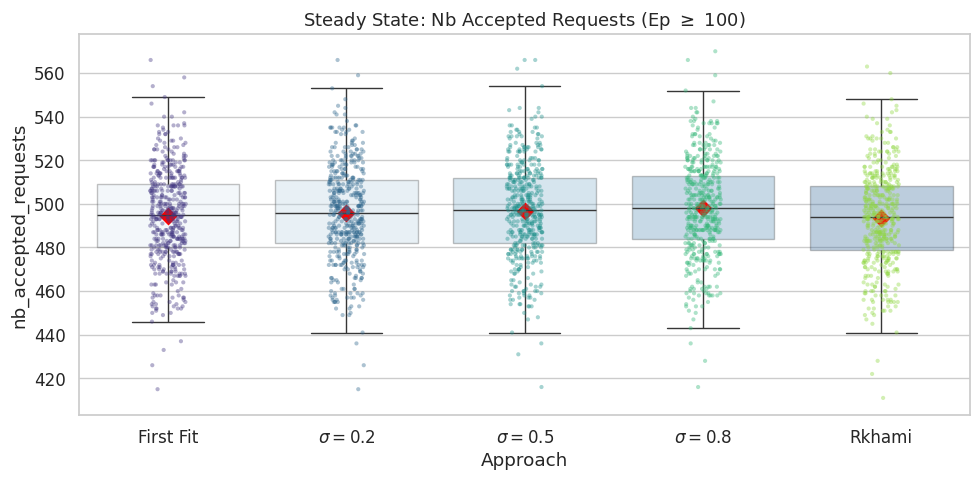

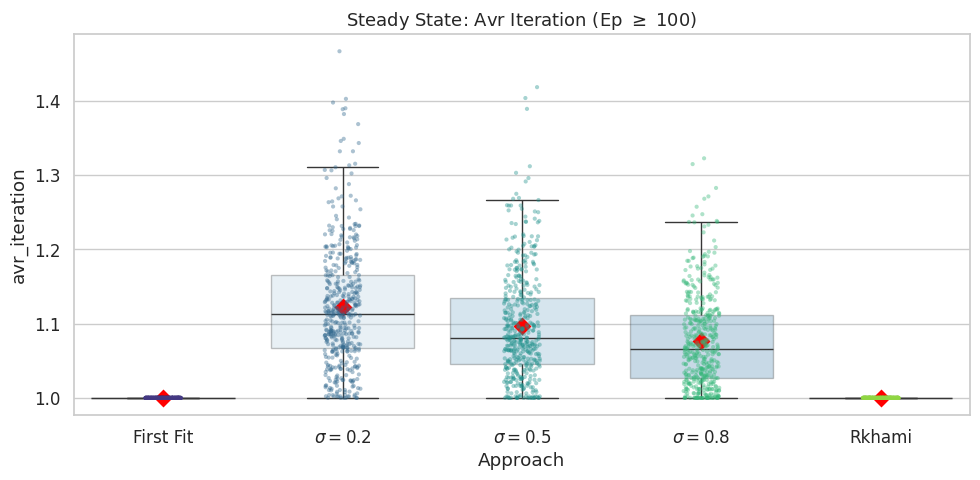

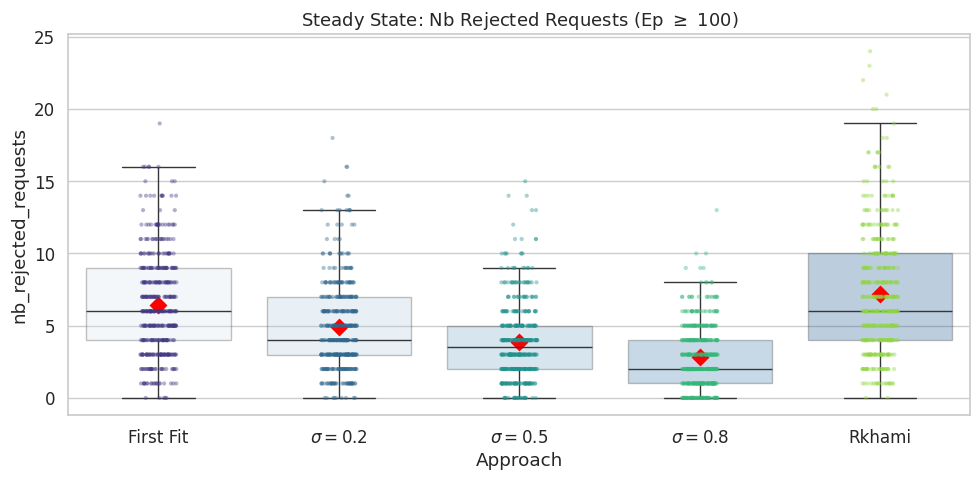

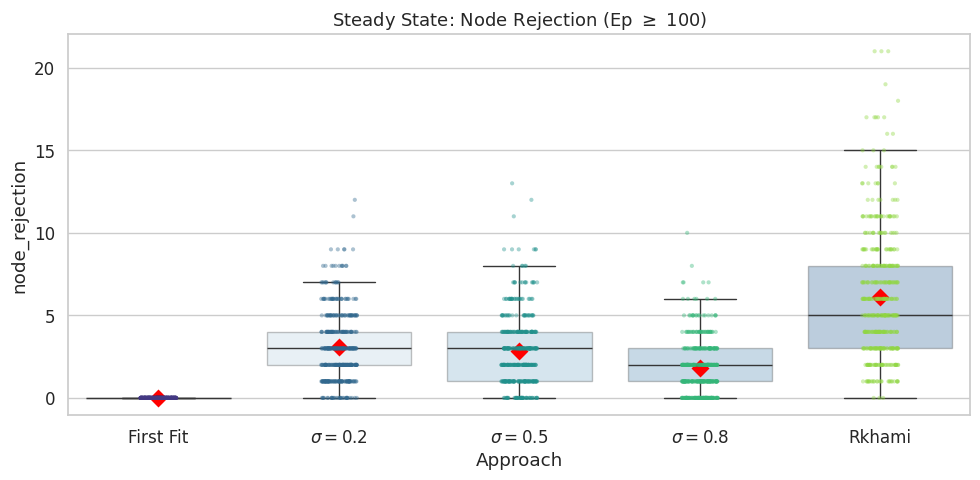

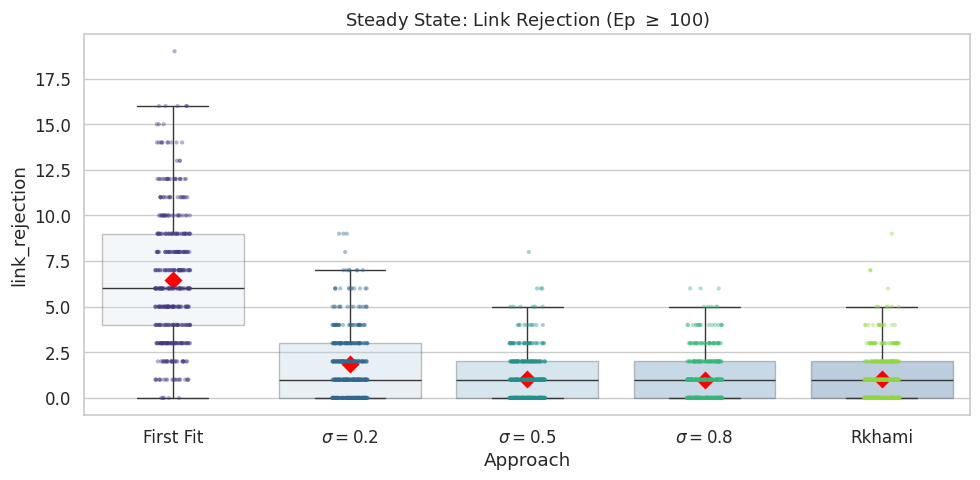

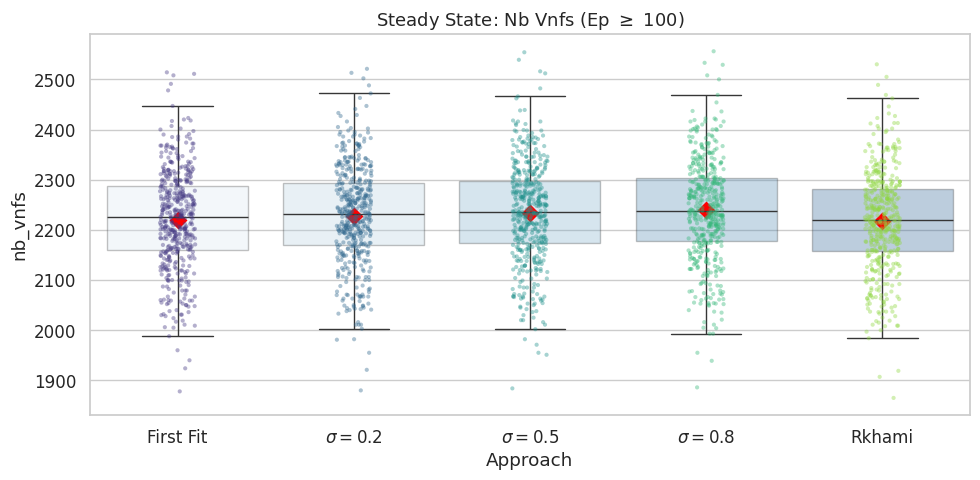

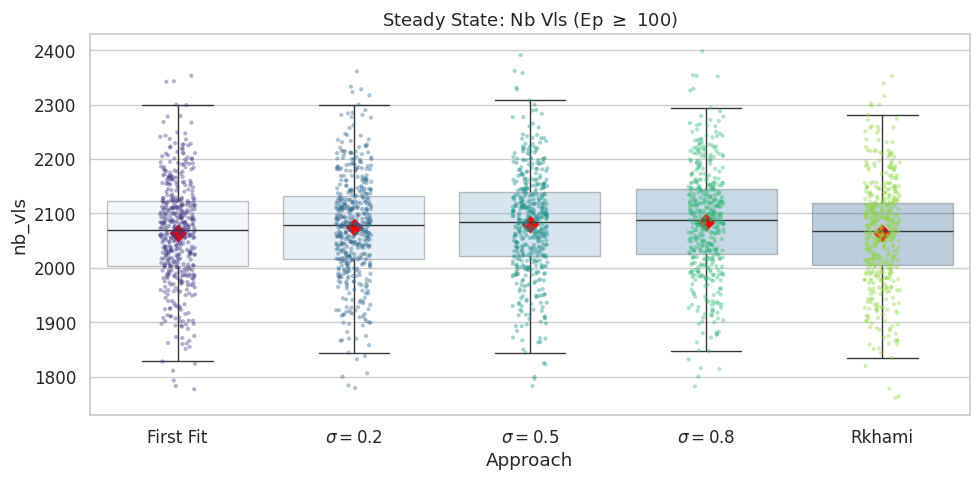

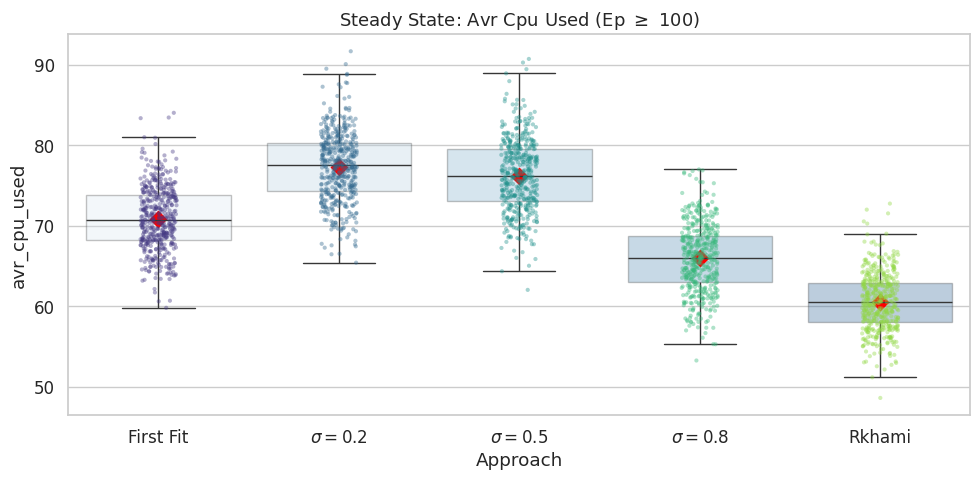

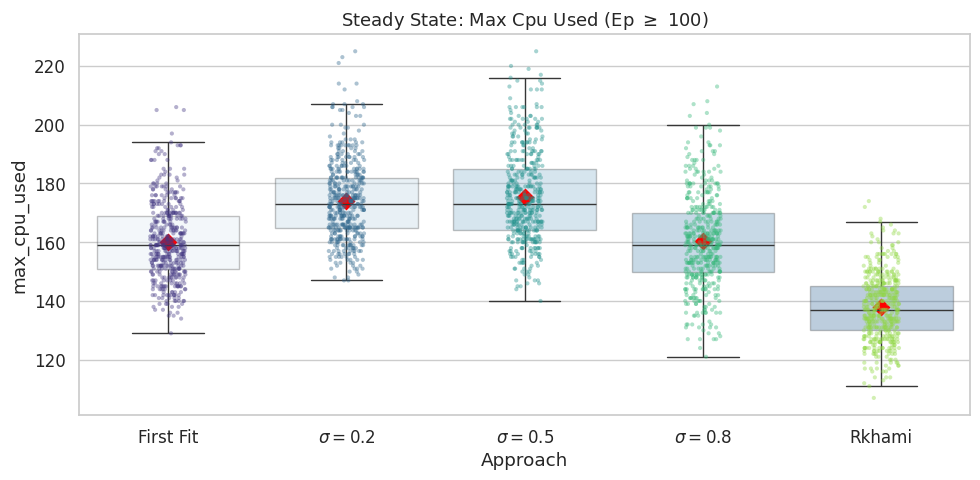

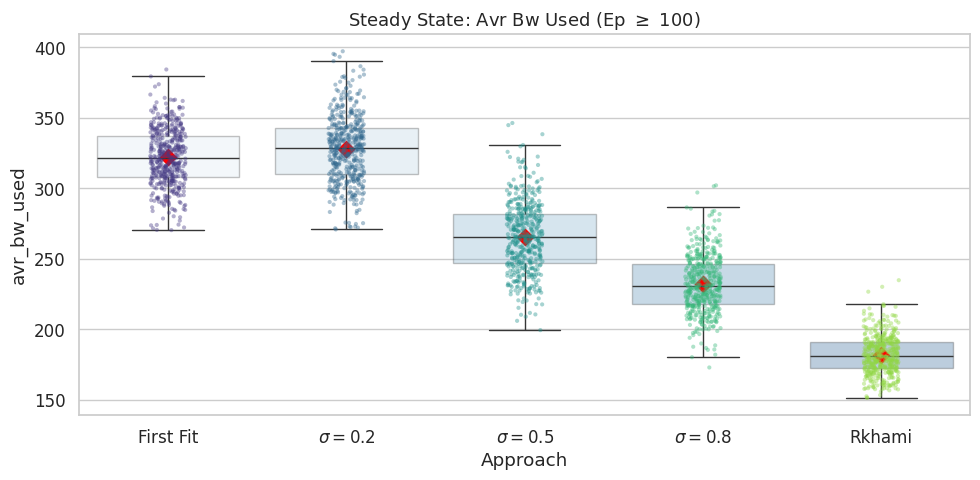

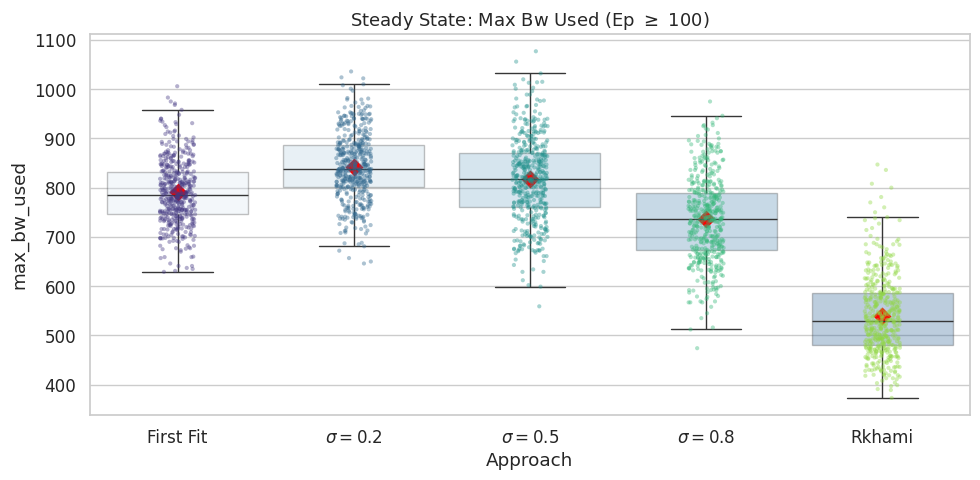

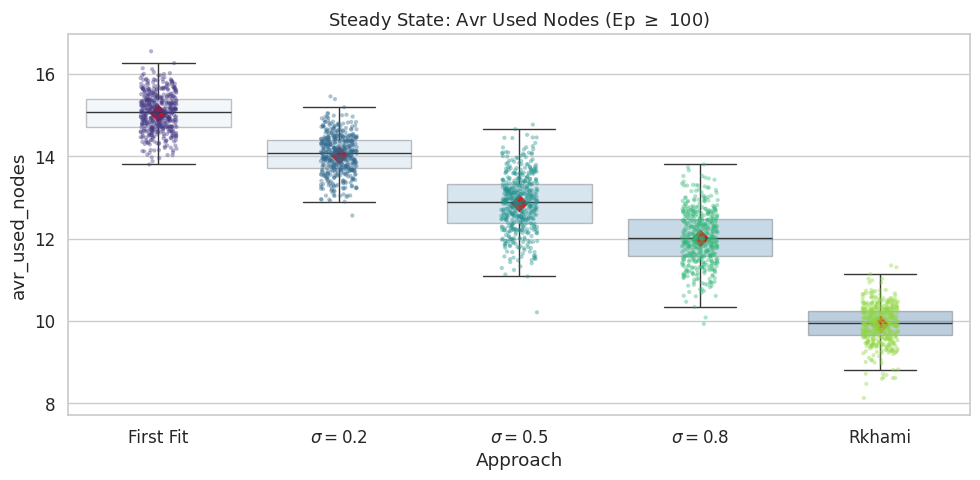

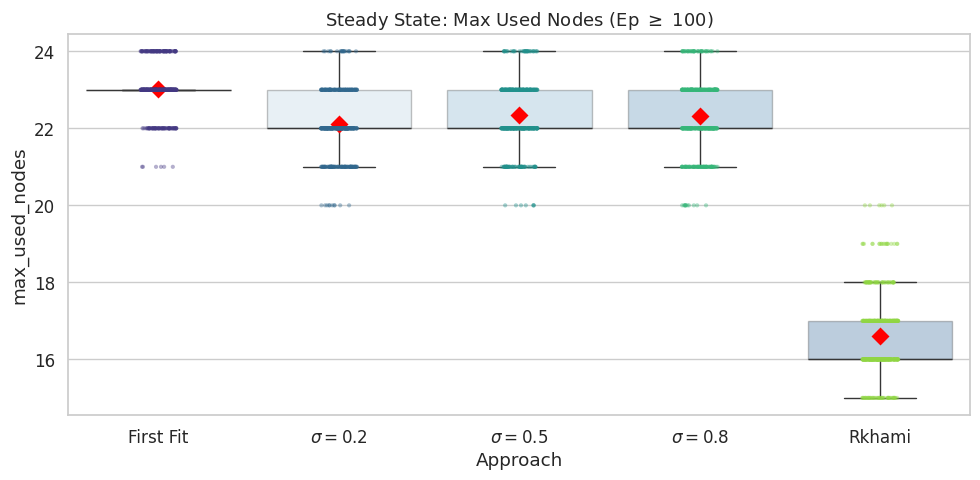

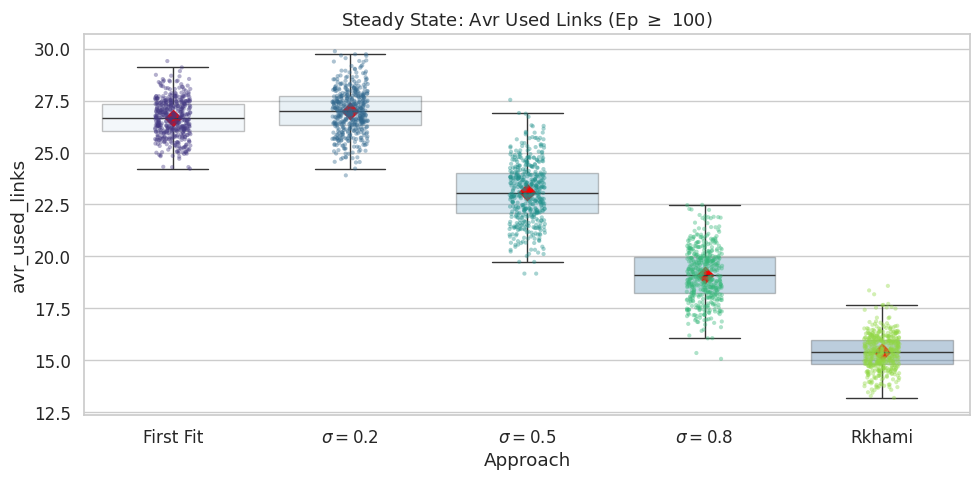

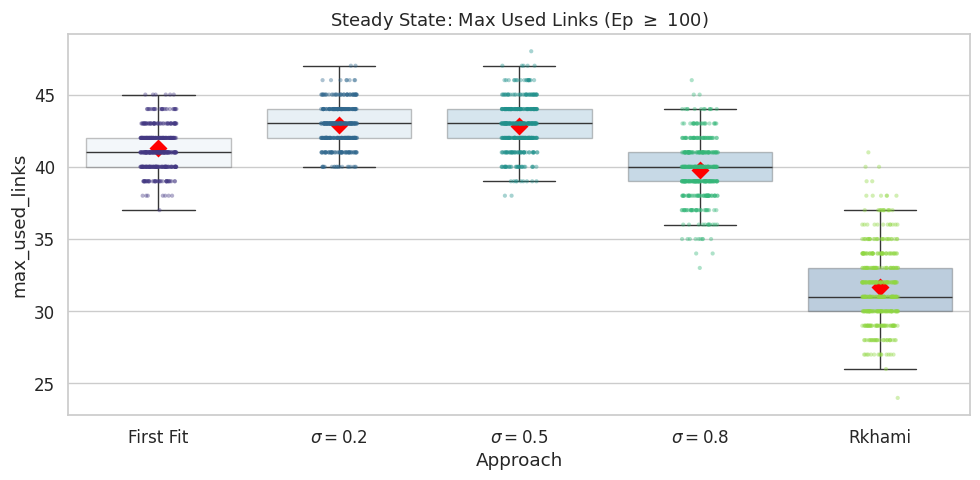

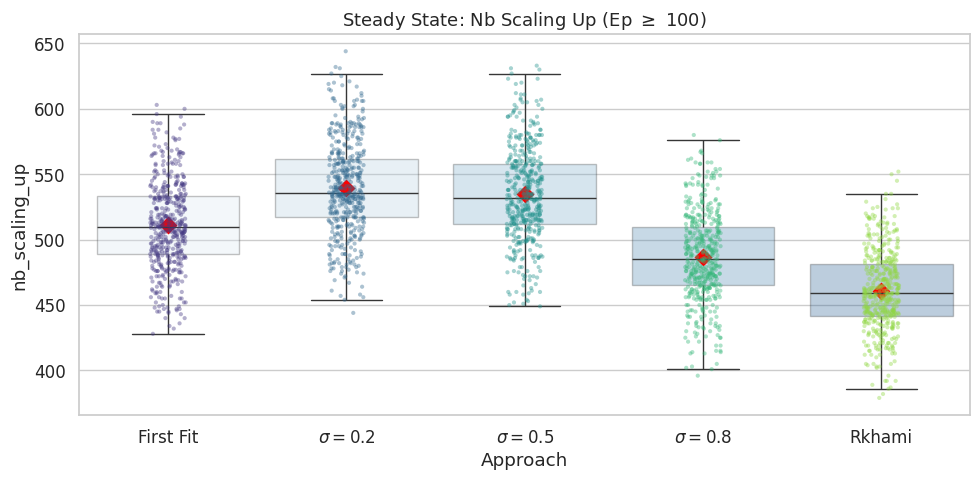

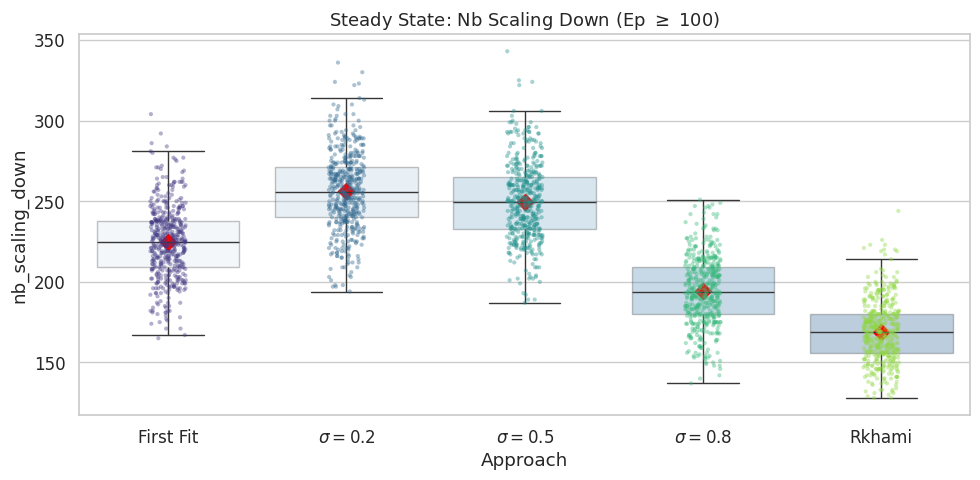

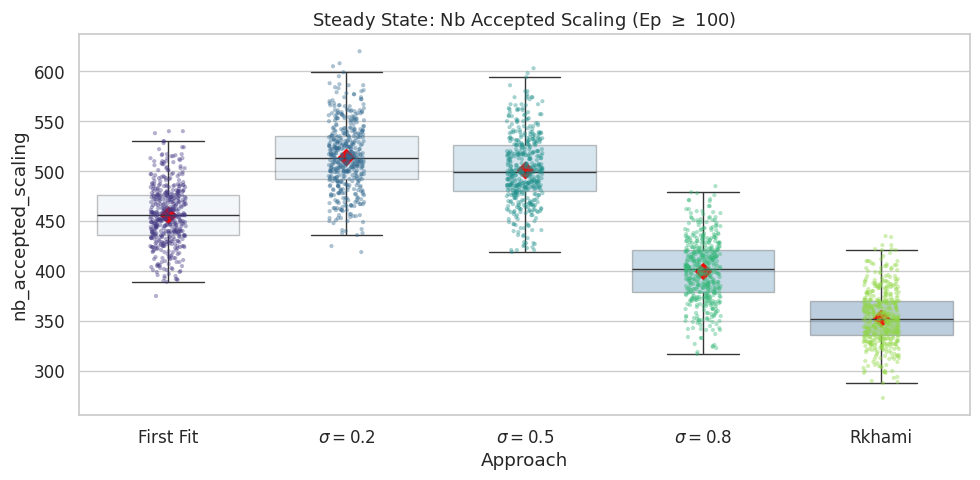

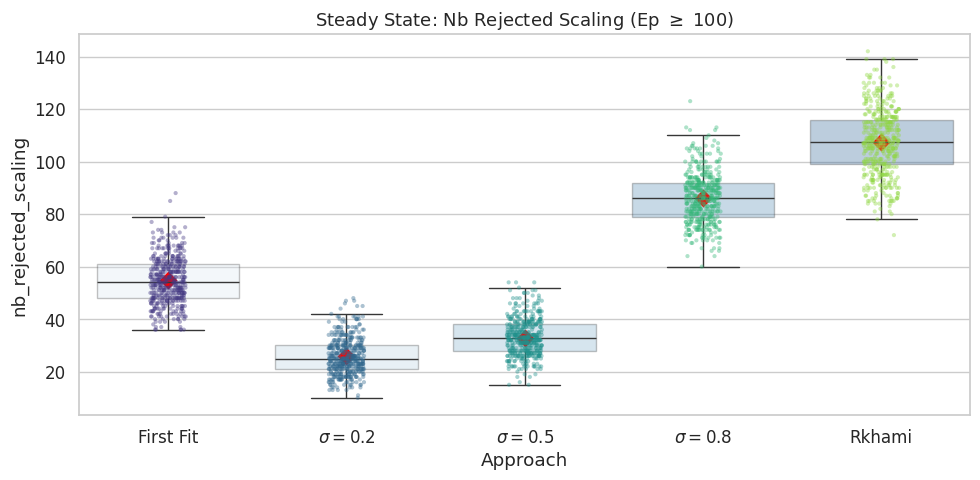

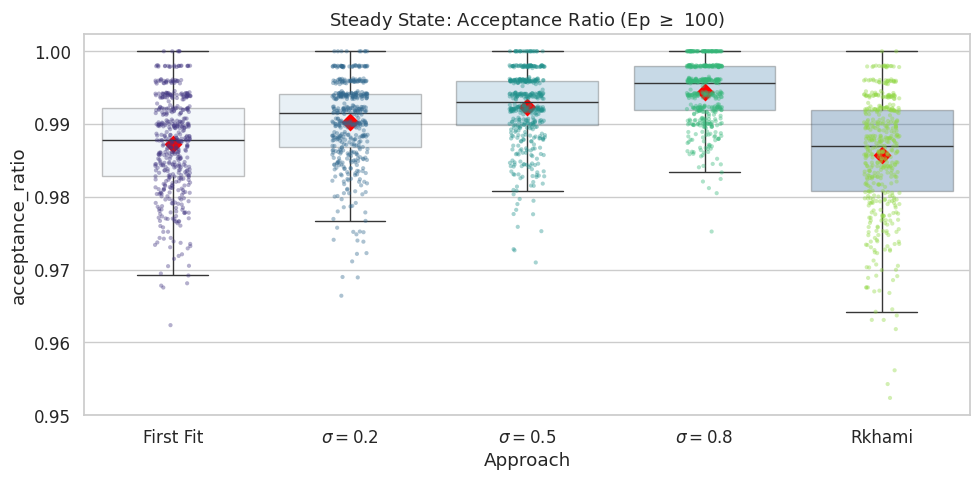

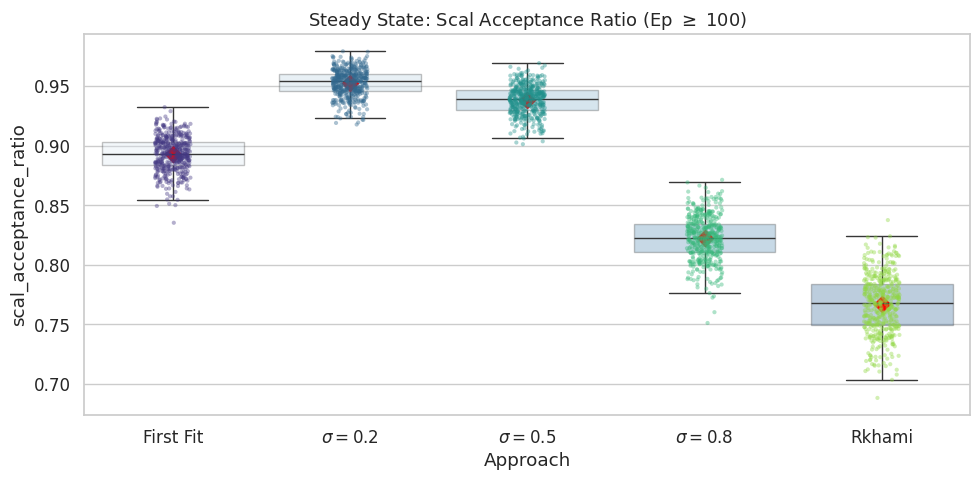

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. SETTINGS ---
Ep = 100  # Steady state start episode
# os.chdir('/data/yassine/kaouther/vne-sim/Results/history/test/')

APPROACHES = {
    "First Fit": "Firstfit",
    r"$\sigma=0.2$": "sigma_0.2",
    r"$\sigma=0.5$": "sigma_0.5",
    r"$\sigma=0.8$": "sigma_0.8",
    "Rkhami": "Rkhami"
}

# --- 2. DATA LOADING & AUTOMATIC RATIO CALCULATION ---
def load_and_prepare_data(config, start_ep):
    all_data = []
    for label, folder in config.items():
        path = f"{folder}/results.csv"
        if os.path.exists(path):
            df = pd.read_csv(path)
            
            # 1. Add calculated metrics if they exist
            if 'nb_requests' in df.columns and 'nb_accepted_requests' in df.columns:
                df["acceptance_ratio"] = df["nb_accepted_requests"] / df["nb_requests"]
            if 'nb_scaling_up' in df.columns and 'nb_accepted_scaling' in df.columns:
                df["scal_acceptance_ratio"] = df["nb_accepted_scaling"] / df["nb_scaling_up"].replace(0, 1)
            
            # 2. Filter for steady state
            df_steady = df[df['episode'] >= start_ep].copy()
            df_steady['Approach'] = label
            all_data.append(df_steady)
            
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

df_all = load_and_prepare_data(APPROACHES, Ep)

# --- 3. PLOTTING FUNCTION ---
def plot_metric(df, metric):
    plt.figure(figsize=(10, 5))
    sns.set_style("whitegrid")
    
    # Variance (Boxplot)
    sns.boxplot(
        data=df, x="Approach", y=metric, 
        palette="Blues", hue="Approach", legend=False,
        showfliers=False, boxprops={'alpha': 0.3}
    )
    
    # Individual Points (Scatter/Stripplot)
    sns.stripplot(
        data=df, x="Approach", y=metric, 
        hue="Approach", palette="viridis", 
        alpha=0.4, jitter=True, legend=False, size=3
    )
    
    # Mean Marker
    sns.pointplot(
        data=df, x="Approach", y=metric, 
        estimator='mean', color='red', markers='D', 
        linestyles='', errorbar=None
    )

    clean_title = metric.replace('_', ' ').title()
    plt.title(rf"Steady State: {clean_title} (Ep $\geq$ {Ep})", fontsize=13)
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# --- 4. AUTOMATIC EXECUTION FOR ALL METRICS ---
if not df_all.empty:
    # Get all numeric columns except 'episode'
    all_metrics = df_all.select_dtypes(include=['number']).columns.tolist()
    if 'episode' in all_metrics:
        all_metrics.remove('episode')

    print(f"Found {len(all_metrics)} metrics to plot. Generating...")
    
    for m in all_metrics:
        plot_metric(df_all, m)
else:
    print("No data found. Please check your file paths.")